In [1]:
import pandas as pd
import analysis_utility
import text_scene_detection_utility
%matplotlib inline

### OCR-Test on FB Data

In [2]:
train_path = r'data\data_fb/train.jsonl'
train_df = pd.read_json(train_path, lines=True)
train_df.head(1)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters


#### get a random sample

In [3]:
train_df = train_df.sample(n=1000, random_state=11)

In [4]:
train_df.head(1)

,id,img,label,text
5926,28461,img/28461.png,0,red bull gives you wings vodka gives you 4x4


#### perform OCR on df

In [5]:
df_result = analysis_utility.ocr_on_df(df=train_df, ds_name='fb', path='data/data_fb/img/', img_format='png')

999

In [6]:
df_result

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors
0,fb,28461,18.289230,red bull gives you wings vodka gives you 4x4,hel (dol chves vou wings a vodka gives you ay,white,128.589986
1,fb,64905,96.027634,when you get to choose your own mental illness,cone $9 oe ke) o® of oe sps oe ls xx on nan vo...,white,196.700872
2,fb,58947,0.000000,dumb and happy,/ dumb,white,56.939592
3,fb,14590,89.958191,fifty shades of goat an isis love story,fifty shades of goat an ses love stor,white,80.431470
4,fb,75260,64.574295,pot holes what a great way to wake you up,pot holes what q great way to wake you u,white,129.283776
...,...,...,...,...,...,...,...
995,fb,07319,87.395676,"musslamic democrat, ilhan omar, has threatened...","musslanite democrat, than omar, has ial member...",white,117.890526
996,fb,43259,96.825943,"all she wanted to hear was ""i love you"" all he...",all sits wanted to hear was love you all he wa...,white,145.027100
997,fb,87261,94.950882,how many nails are there in a lesbian's coffin...,how many nails lad hilda a lesbian ss cofiin? ...,white,46.962464
998,fb,89602,55.217052,bring me another smurf,bring ine another smurt,white,162.940761


In [7]:
df_result.to_csv('fb_ocr_result_all_black.csv')

In [8]:
df_result.font_color.value_counts()

white    914
black     86
Name: font_color, dtype: int64

In [9]:
df_result[df_result['font_color']=='black'].all_mean_edge_colors.mean()

220.2386114163753

In [10]:
df_result[df_result['font_color']=='white'].all_mean_edge_colors.mean()

105.40207041313435

#### add KPIs on df

In [11]:
df_result = analysis_utility.add_columns_on_df(df_result, ['cos_similarity'])

In [12]:
df_result.confidence.mean()

64.23219870700007

In [13]:
df_result.cos_similarity.mean()

52.24833370882027

In [14]:
df_result[['cos_similarity', 'confidence']].sort_values(by='cos_similarity', ascending=False)

,cos_similarity,confidence
294,100.0,91.639061
931,100.0,26.581543
530,100.0,76.642113
134,100.0,49.998459
643,100.0,16.489944
...,...,...
96,0.0,0.000000
92,0.0,96.106056
793,0.0,13.870201
445,0.0,30.047562


<AxesSubplot:>

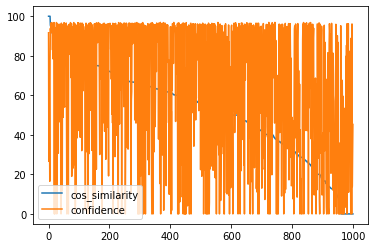

In [15]:
df_result[['cos_similarity', 'confidence']].sort_values(by='cos_similarity', ascending=False).reset_index(drop=True).plot(kind='line')

In [16]:
df_result.sort_values(by='cos_similarity')

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors,cos_similarity
499,fb,26543,59.505669,fucking a 5 year old fucking five 1 year olds ...,yed ‘ved o,white,77.055408,0.0
42,fb,48639,48.002911,disney and chill ?,disiey antl eyit a,white,197.491057,0.0
884,fb,59817,82.389137,putting bows on your pet,dotting ows oll ou pea,black,214.925140,0.0
266,fb,15796,18.502998,a short history of my snack regimen,i stole be story: i i,white,144.763067,0.0
537,fb,79803,44.865074,when did you have lunch?,min tid vout rave hunch,black,210.651460,0.0
...,...,...,...,...,...,...,...,...
643,fb,68719,16.489944,when everyone thinks you're the bomb,when everyone thinks you're the bomb,white,95.875702,100.0
134,fb,74096,49.998459,him:,him,white,68.993902,100.0
530,fb,71628,76.642113,where's my water?,where's my water,white,147.388876,100.0
294,fb,94357,91.639061,"""the master race'",“the master race,white,48.504327,100.0
